#Akshat Agrawal - IIT2019214

# Q6.c

In [14]:
import numpy as np
import pandas as pd
import math
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

input_data = pd.read_csv("https://raw.githubusercontent.com/akshatagrawal22/ML_Assignment/main/Housing%20Price%20data%20set.csv")


#Performing feature scanning on area:

In [3]:
Price_of_house = input_data['price']
Area_of_floor = input_data['lotsize']
Number_of_bedrooms = input_data['bedrooms']
Number_of_bathrooms = input_data['bathrms']

Mean_Area_of_floor= np.mean(Area_of_floor)
Max_Area_of_floor= max(Area_of_floor)
Min_Area_of_floor = min(Area_of_floor)
Scaled_area_of_floor = []
for i in Area_of_floor:
	Scaled_area_of_floor.append((i - Mean_Area_of_floor) / (Max_Area_of_floor- Min_Area_of_floor))

Train_features= []
for i in range(383):
	Train_features.append([1, Scaled_area_of_floor[i], Number_of_bedrooms[i], Number_of_bathrooms[i]])
Train_price = Price_of_house[:383]
Test_price = []
Test_features = []
for i in range(383, len(Price_of_house)):
	Test_features.append([1, Scaled_area_of_floor[i], Number_of_bedrooms[i], Number_of_bathrooms[i]])
	Test_price.append(Price_of_house[i])
m = len(Train_features)

# Function to calculate Slope to find coefficients:

In [4]:
def Slope(coefficient, Train_features, Train_price, ind):
	err = 0
	for i in range(len(Train_features)):
		itr = 0
		for j in range(len(coefficient)):
			itr = itr + coefficient[j] * Train_features[i][j]
		err += (itr - Train_price[i]) * Train_features[i][ind]
	return err

# Using scaled batch gradient without regularisation:


In [6]:
Rate_of_learning = 0.001
m = len(Train_features)

coefficient = [0, 0, 0, 0]
for i in range(5000):
	Temp_coefficient = coefficient.copy()
	for j in range(len(coefficient)):
		Temp_coefficient[j] = Temp_coefficient[j] - ((Rate_of_learning / m) * (Slope(coefficient, Train_features, Train_price, j)))
	coefficient = Temp_coefficient.copy()

#Finding Mean absolute percentage error:

In [10]:
err = 0
for i in range(len(Test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * Test_features[i][j]
	err += abs(predicted - Test_price[i]) / Test_price[i]
err = (err / len(Test_features)) * 90
print("Mean absolute percentage Error is : " + str(err))
print()

Mean absolute percentage Error is : 17.934312568107753



#Using scaled batch gradient with regularisation:

In [8]:
Rate_of_learning = 0.001
Lambda = -49
coefficient = [0, 0, 0, 0]

for epochs in range(5000):
	Temp_coefficient = coefficient.copy()
	for j in range(len(coefficient)):
		if (j == 0):
			Temp_coefficient[j] = Temp_coefficient[j] - ((Rate_of_learning / m) * (Slope(coefficient, Train_features, Train_price, j)))	
		else:
			Temp_coefficient[j] = (1 - Rate_of_learning * Lambda / m) * Temp_coefficient[j] - ((Rate_of_learning / m) * (Slope(coefficient, Train_features, Train_price, j)))
	coefficient = Temp_coefficient.copy()

# Finding Mean absolute percentage Error:

In [9]:
err = 0
for i in range(len(Test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * Test_features[i][j]
	err += abs(predicted - Test_price[i]) / Test_price[i]
err = (err / len(Test_features)) * 100
print("Mean absolute percentage Error is : " + str(err))
print()

def SlopeStoch(coefficient,Train_features,ActualVal,ind):
	itr = 0
	for j in range(len(coefficient)):
		itr = itr + coefficient[j]*Train_features[j]
	return (itr - ActualVal) * Train_features[ind]

Mean absolute percentage Error is : 19.92701396456417



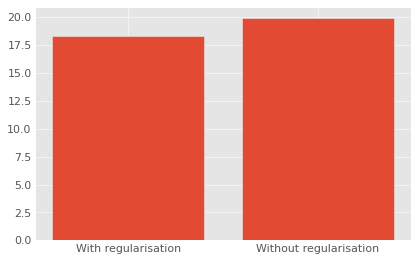

In [28]:
plt.style.use('ggplot')
_= plt.bar(["With regularisation","Without regularisation"],height=[18.30641888247704,19.92701396456417])
plt.show()

#Using Scaled Stochastic gradient without regularisation:




In [ ]:
print("Using Stochastic gradient without regularisation")

Rate_of_learning = 0.005
coefficient = [0, 0, 0, 0]
print("Initial coefficients: ")
print(coefficient)

for iter in range(10):
	for i in range(len(Train_price)):
		Temp_coefficient = coefficient.copy()
		for j in range(4):
			Temp_coefficient[j] = Temp_coefficient[j] - (Rate_of_learning * (SlopeStoch(coefficient, Train_features[i], Train_price[i], j)))
		coefficient = Temp_coefficient.copy()

print("Final coefficients are:")
print(coefficient)

# Finding Mean absolute percentage Error.
err = 0
for i in range(len(Test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * Test_features[i][j]
	err += abs(predicted - Test_price[i]) / Test_price[i]
err = (err / len(Test_features)) * 100
print("Mean absolute percentage Error is : " + str(err))
print()

Using Stochastic gradient without regularisation
Initial coefficients: 
[0, 0, 0, 0]
Final coefficients are:
[18648.663069990776, 15073.501985961251, 15766.862790309351, 22357.23427068568]
Mean absolute percentage Error is : 32.87903970192347



#Using Scaled Stochastic gradient with regularisation:

In [ ]:
print("Using Stochastic gradient with regularisation")

Rate_of_learning = 0.005
Lambda = 142000
coefficient = [0, 0, 0, 0]
print("Initial coefficients: ")
print(coefficient)

for iter in range(10):
	for i in range(len(Train_price)):
		Temp_coefficient = coefficient.copy()
		for j in range(4):
			if j == 0:
				Temp_coefficient[j] = Temp_coefficient[j] - (Rate_of_learning * (SlopeStoch(coefficient, Train_features[i], Train_price[i], j)))
			else:
				Temp_coefficient[j] = (1 - Rate_of_learning * Lambda) * Temp_coefficient[j] - (Rate_of_learning * (SlopeStoch(coefficient, Train_features[i], Train_price[i], j)))
		coefficient = Temp_coefficient.copy()

print("Final coefficients are:")
print(coefficient)

# Finding Mean absolute percentage Error.
err = 0
for i in range(len(Test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * Test_features[i][j]
	err += abs(predicted - Test_price[i]) / Test_price[i]
err = (err / len(Test_features)) * 100
print("Mean absolute percentage Error is : " + str(err))
print()


Using Stochastic gradient with regularisation
Initial coefficients: 
[0, 0, 0, 0]
Final coefficients are:
[nan, nan, nan, nan]
Mean absolute percentage Error is : nan



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


#Using Scaled Minibatch gradient without regularisation for batch size = 30:

In [ ]:
print("Using Scaled Minibatch gradient without regularisation for batch size = 30")

Size_of_batch = 30;
Rate_of_learning = 0.002
coefficient = [0, 0, 0, 0]
Number_of_Batches = math.ceil(len(Train_price) / Size_of_batch)
equallyDiv = False
if (len(Train_price) % Size_of_batch == 0):
	equallyDiv = True;

for epoch in range(30):
	for batch in range(Number_of_Batches):
		Summation = [0, 0, 0, 0]
		for j in range(len(coefficient)):
			for i in range(Size_of_batch):
				if (batch * Size_of_batch + i == len(Train_features)):
					break
				Value_predicted = 0.0
				for wj in range(len(coefficient)):
					Value_predicted += coefficient[wj] * Train_features[batch * Size_of_batch + i][wj]
				Value_predicted -= Train_price[batch * Size_of_batch + i]
				Value_predicted *= Train_features[batch * Size_of_batch + i][j]
				Summation[j] += Value_predicted;

		if (not equallyDiv and batch == Number_of_Batches - 1):
			for j in range(len(Summation)):
				coefficient[j] -= (Summation[j] / (len(Train_price) % Size_of_batch)) * Rate_of_learning
		else:
			for j in range(len(Summation)):
				coefficient[j] -= (Summation[j] / Size_of_batch) * Rate_of_learning
print("Final coefficients are:")
print(coefficient)

# Finding Mean absolute percentage Error.
err = 0
for i in range(len(Test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * Test_features[i][j]
	err += abs(predicted - Test_price[i]) / Test_price[i]
err = (err / len(Test_features)) * 100
print("Mean absolute percentage Error is : " + str(err))
print()

Using Scaled Minibatch gradient without regularisation for batch size = 30
Final coefficients are:
[5834.079583903288, 1398.7151139126267, 15789.080128016818, 10184.60342876498]
Mean absolute percentage Error is : 21.04517419184361



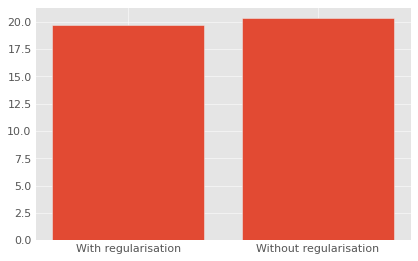

In [32]:
plt.style.use('ggplot')
_= plt.bar(["With regularisation","Without regularisation"],height=[19.72984683085249,20.34290336445297])
plt.show()

#Using Scaled Minibatch gradient with regularisation for batch size = 30:

In [ ]:
print("Using Scaled Minibatch gradient with regularisation for batch size = 30")

Size_of_batch = 30;
Rate_of_learning = 0.002
Lambda = -372
coefficient = [0, 0, 0, 0]
Number_of_Batches = math.ceil(len(Train_price) / Size_of_batch)
equallyDiv = False
if (len(Train_price) % Size_of_batch == 0):
	equallyDiv = True;

for epoch in range(30):
	for batch in range(Number_of_Batches):
		Summation = [0, 0, 0, 0]
		for j in range(len(coefficient)):
			for i in range(Size_of_batch):
				if (batch * Size_of_batch + i == len(Train_features)):
					break
				Value_predicted = 0.0
				for wj in range(len(coefficient)):
					Value_predicted += coefficient[wj] * Train_features[batch * Size_of_batch + i][wj]
				Value_predicted -= Train_price[batch * Size_of_batch + i]
				Value_predicted *= Train_features[batch * Size_of_batch + i][j]
				Summation[j] += Value_predicted;

		if (not equallyDiv and batch == Number_of_Batches - 1):
			for j in range(len(Summation)):
				if j == 0:
					coefficient[j] -= (Summation[j] / (len(Train_price) % Size_of_batch)) * Rate_of_learning
				else:
					coefficient[j] = (1 - Rate_of_learning * Lambda / m) * coefficient[j] - (Summation[j] / (len(Train_price) % Size_of_batch)) * Rate_of_learning
		else:
			for j in range(len(Summation)):
				if j == 0:
					coefficient[j] -= (Summation[j] / Size_of_batch) * Rate_of_learning
				else:
					coefficient[j] = (1 - Rate_of_learning * Lambda / m) * coefficient[j] - (Summation[j] / Size_of_batch) * Rate_of_learning
print("Final coefficients are:")
print(coefficient)

# Finding Mean absolute percentage Error.
err = 0
for i in range(len(Test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * Test_features[i][j]
	err += abs(predicted - Test_price[i]) / Test_price[i]
err = (err / len(Test_features)) * 100
print("Mean absolute percentage Error is : " + str(err))
print()

Using Scaled Minibatch gradient with regularisation for batch size = 30
Final coefficients are:
[2681.43806108953, 2059.662947401348, 17584.987500198524, 12538.251896070407]
Mean absolute percentage Error is : 20.000670512331244



#Q6.d

In [ ]:
import numpy as np
import pandas as pd
import math

def calculate_error(matY, y_predicted):
    err = 0
    for i in range(len(matY)):
        err += abs(matY[i] - y_predicted[i]) / matY[i]
    err = err / len(matY)
    return err * 100

def kernel(matX, xi, Tau_parameter):
    return np.exp(-np.sum((xi - matX) ** 2, axis = 1) / (2 * Tau_parameter * Tau_parameter))

def LocallyWeightedLR(matX, xi, matY, Tau_parameter):
	TransposeMatrixX = np.transpose(matX)
	W = kernel(matX, xi, Tau_parameter)
	MatrixXTransposeW = TransposeMatrixX * W
	MatrixXTransposeWX = np.matmul(MatrixXTransposeW, matX)
	InverseMatrixXTransposeWX = np.linalg.pinv(MatrixXTransposeWX)
	InverseMatrixXTransposeWXMatrixXTransposeW = np.matmul(InverseMatrixXTransposeWX, MatrixXTransposeW)
	InverseMatrixXTransposeWXMatrixXTransposeWY = np.matmul(InverseMatrixXTransposeWXMatrixXTransposeW, matY)
	InverseMatrixXTransposeWXMatrixXTransposeWYTranspose = np.transpose(InverseMatrixXTransposeWXMatrixXTransposeWY)
	return InverseMatrixXTransposeWXMatrixXTransposeWYTranspose.dot(xi)

input_data = pd.read_csv("https://raw.githubusercontent.com/akshatagrawal22/ML_Assignment/main/Housing%20Price%20data%20set.csv", usecols = ["price", "lotsize", "bedrooms", "bathrms"])
Area_of_floor = input_data['lotsize']
Number_of_bedrooms = input_data['bedrooms']
Number_of_bathrooms = input_data['bathrms']
matY = input_data['price']
matY = np.array(matY)
matY = matY.reshape(matY.shape[0], 1)

#Performing feature scanning on area:

In [ ]:
Mean_area_of_floor = np.mean(Area_of_floor)
Max_area_of_floor = max(Area_of_floor)
Min_area_of_floor = min(Area_of_floor)
Scaled_area_of_floor = []
for i in Area_of_floor:
	Scaled_area_of_floor.append((i - Mean_area_of_floor) / (Max_area_of_floor - Min_area_of_floor))

matX = []
for i in range(len(Area_of_floor)):
	matX.append([1, Scaled_area_of_floor[i], Number_of_bedrooms[i], Number_of_bathrooms[i]])
matX = np.array(matX)

Tau_parameter = 0.00005
print("Using Locally Weighted Linear Regression for Tau = " + str(Tau_parameter))
pred = []
for i in range(matX.shape[0]):
	y_predicted = LocallyWeightedLR(matX, matX[i], matY, Tau_parameter)
	pred.append(y_predicted)
print("Mean absolute percentage err is : " + str(calculate_error(matY,pred)))
print()

Price_of_house = input_data['price']

#segmenting the features
Train_features = []
for i in range(383):
	Train_features.append([1, Scaled_area_of_floor[i], Number_of_bedrooms[i], Number_of_bathrooms[i]])
Train_price = Price_of_house[:383]
Test_price = []
FeaturesTest = []
for i in range(383, len(Price_of_house)):
	FeaturesTest.append([1, Scaled_area_of_floor[i], Number_of_bedrooms[i], Number_of_bathrooms[i]])
	Test_price.append(Price_of_house[i])
m = len(Train_features)

# Function to calculate Slope to find coefficients
def Slope(coefficient, Train_features, Train_price, ind):
	err = 0
	for i in range(len(Train_features)):
		itr = 0
		for j in range(len(coefficient)):
			itr = itr + coefficient[j] * Train_features[i][j]
		err += (itr - Train_price[i]) * Train_features[i][ind]
	return err

Using Locally Weighted Linear Regression for Tau = 5e-05
Mean absolute percentage err is : [5.40732082]



#Using scaled batch gradient with regularisation:

In [ ]:
print("Using scaled batch gradient with regularisation")
Rate_of_learning = 0.001
Lambda = -49
coefficient = [0, 0, 0, 0]
print("Initial coefficients: ")
print(coefficient)
for epochs in range(5000):
	Temp_coefficient = coefficient.copy()
	for j in range(len(coefficient)):
		if (j == 0):
			Temp_coefficient[j] = Temp_coefficient[j] - ((Rate_of_learning / m) * (Slope(coefficient, Train_features, Train_price, j)))	
		else:
			Temp_coefficient[j] = (1 - Rate_of_learning * Lambda / m) * Temp_coefficient[j] - ((Rate_of_learning / m) * (Slope(coefficient, Train_features, Train_price, j)))
	coefficient = Temp_coefficient.copy()
print("Final coefficients are:")
print(coefficient)

# Finding Mean absolute percentage err.
err = 0
for i in range(len(FeaturesTest)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * FeaturesTest[i][j]
	err += abs(predicted - Test_price[i]) / Test_price[i]
err = (err / len(FeaturesTest)) * 100
print("Mean absolute percentage err is : " + str(err))
print()

def SlopeStoch(coefficient,Train_features,ActualVal,ind):
	itr = 0
	for j in range(len(coefficient)):
		itr = itr + coefficient[j]*Train_features[j]
	return (itr - ActualVal) * Train_features[ind]



Using scaled batch gradient with regularisation
Initial coefficients: 
[0, 0, 0, 0]
Final coefficients are:
[5037.585668619078, 11147.667574879839, 10378.580439168689, 22647.298983883848]
Mean absolute percentage err is : 19.92701396456417



#Using Scaled Stochastic gradient with regularisation:

In [ ]:
print("Using Stochastic gradient with regularisation")

# I tried with different values of tau but found this to be the best.
Rate_of_learning = 0.004
Lambda = 142000
coefficient = [0, 0, 0, 0]
print("Initial coefficients: ")
print(coefficient)

for iter in range(10):
	for i in range(len(Train_price)):
		Temp_coefficient = coefficient.copy()
		for j in range(4):
			if j == 0:
				Temp_coefficient[j] = Temp_coefficient[j] - (Rate_of_learning * (SlopeStoch(coefficient, Train_features[i], Train_price[i], j)))
			else:
				Temp_coefficient[j] = (1 - Rate_of_learning * Lambda / m) * Temp_coefficient[j] - (Rate_of_learning * (SlopeStoch(coefficient, Train_features[i], Train_price[i], j)))
		coefficient = Temp_coefficient.copy()

print("Final coefficients are:")
print(coefficient)

# Finding Mean absolute percentage err.
err = 0
for i in range(len(FeaturesTest)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * FeaturesTest[i][j]
	err += abs(predicted - Test_price[i]) / Test_price[i]
err = (err / len(FeaturesTest)) * 100
print("Mean absolute percentage err is : " + str(err))
print()


Using Stochastic gradient with regularisation
Initial coefficients: 
[0, 0, 0, 0]
Final coefficients are:
[68977.37183533033, 153.6672368058788, 622.1158811423422, 207.34938918615728]
Mean absolute percentage err is : 22.392602067246287



#Using Scaled Minibatch gradient with regularisation for batch size = 30

In [ ]:
print("Using Scaled Minibatch gradient with regularisation for batch size = 30")

Size_of_batch = 30;
Rate_of_learning = 0.002
Lambda = -372
coefficient = [0, 0, 0, 0]
NoOfBatches = math.ceil(len(Train_price) / Size_of_batch)
equallyDiv = False
if (len(Train_price) % Size_of_batch == 0):
	equallyDiv = True;

for epoch in range(30):
	for batch in range(NoOfBatches):
		Summation = [0, 0, 0, 0]
		for j in range(len(coefficient)):
			for i in range(Size_of_batch):
				if (batch * Size_of_batch + i == len(Train_features)):
					break
				Value_predicted = 0.0
				for wj in range(len(coefficient)):
					Value_predicted += coefficient[wj] * Train_features[batch * Size_of_batch + i][wj]
				Value_predicted -= Train_price[batch * Size_of_batch + i]
				Value_predicted *= Train_features[batch * Size_of_batch + i][j]
				Summation[j] += Value_predicted;

		if (not equallyDiv and batch == NoOfBatches - 1):
			for j in range(len(Summation)):
				if j == 0:
					coefficient[j] -= (Summation[j] / (len(Train_price) % Size_of_batch)) * Rate_of_learning
				else:
					coefficient[j] = (1 - Rate_of_learning * Lambda / m) * coefficient[j] - (Summation[j] / (len(Train_price) % Size_of_batch)) * Rate_of_learning
		else:
			for j in range(len(Summation)):
				if j == 0:
					coefficient[j] -= (Summation[j] / Size_of_batch) * Rate_of_learning
				else:
					coefficient[j] = (1 - Rate_of_learning * Lambda / m) * coefficient[j] - (Summation[j] / Size_of_batch) * Rate_of_learning
print("Final coefficients are:")
print(coefficient)

# Finding Mean absolute percentage err.
err = 0
for i in range(len(FeaturesTest)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * FeaturesTest[i][j]
	err += abs(predicted - Test_price[i]) / Test_price[i]
err = (err / len(FeaturesTest)) * 100
print("Mean absolute percentage err is : " + str(err))
print()

Using Scaled Minibatch gradient with regularisation for batch size = 30
Final coefficients are:
[2681.43806108953, 2059.662947401348, 17584.987500198524, 12538.251896070407]
Mean absolute percentage err is : 20.000670512331244



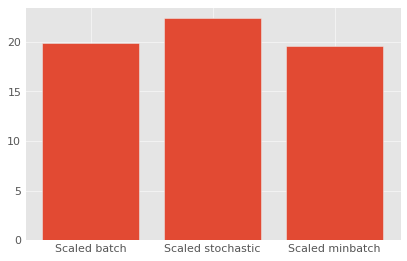

In [33]:

_= plt.bar(["Scaled batch","Scaled stochastic","Scaled minbatch"],height=[19.92701396456417,22.391965664113076,19.550681895981263])
plt.show()